# Exploratory Data Analysis Part Two - Review Text Attributes

This notebook contains exploratory data analysis of the review text attributes with respect to ratings:

* Section 1 - basic data cleaning
* Section 2 - number of words in a review
* Section 3 - average word length
* Section 4 - capitalization
* Section 5 - punctuation 
* Section 6 - emojis
* Section 7 - heatmap
* Section 8 - positive and negative reviews review titles and text
* Section 9 - positive and negative word clouds
* Sections 10 - most frequent positive and negative words by category

## Import libraries and load data

In [1]:
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats
import researchpy as rp
import re
import pickle
from collections import Counter
#import emot
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
#import emoji
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
nltk.download('punkt')
import gensim
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imoge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Bring in full review dataset including reviews with null location values
reviews = pd.read_csv("CombinedDataFrame.csv")

In [4]:
reviews.shape

(10325, 12)

# Section 1: Examine the data and preprocessing

In [5]:
# Examine dataframe
reviews.sample(1)

Unnamed: 0                 Name     Category    Town             Type  \
4245        1068  Grandads Front Room  Attractions  Bognor  Speciality Shop   

                          Location  Contributions        Title  \
4245  Bognor Regis, United Kingdom              5  Great Asset   

                                                 Review  Rating  ReviewMonth  \
4245  Grandad’s Community Shop is a great asset to B...       5            2   

      VisitMonth  
4245           1

In [6]:
# Check datatypes
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10325 entries, 0 to 10324
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10325 non-null  int64 
 1   Name           10325 non-null  object
 2   Category       10325 non-null  object
 3   Town           10325 non-null  object
 4   Type           10325 non-null  object
 5   Location       9960 non-null   object
 6   Contributions  10325 non-null  int64 
 7   Title          10325 non-null  object
 8   Review         10325 non-null  object
 9   Rating         10325 non-null  int64 
 10  ReviewMonth    10325 non-null  int64 
 11  VisitMonth     10325 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 968.1+ KB


In [7]:
# Create new dataframe with just the review related data
reviews = reviews[["Category","Name","Title","Review","Rating","Town"]]

In [8]:
# Combine the title and review text column into one column
reviews['all_text'] = reviews['Title'] + ' ' + reviews['Review']

In [9]:
reviews.head(2)

Category            Name                                Title  \
0           Food  Motte & Bailey           Nice For A Quiet Breakfast   
1  Accommodation    Norfolk Arms  Great value in the heart of arundel   

                                              Review  Rating     Town  \
0  I stopped by Motte and Bailey for a quick bite...       4  Arundel   
1  Booked a room to stay the night in Arundel. Th...       4  Arundel   

                                            all_text  
0  Nice For A Quiet Breakfast I stopped by Motte ...  
1  Great value in the heart of arundel Booked a r...

# Section 2: Number of Words Per Review

Does the number of words per review vary by rating?

## All Categories

In [10]:
# Maximum,minimum and mean length of string
print(reviews.all_text.str.len().max())
print(reviews.all_text.str.len().min())
print(reviews.all_text.str.len().mean())

11422
104
493.0845520581114


In [11]:
# Find number of words per review 
reviews["num_words"] = reviews['all_text'].str.split().apply(len)

In [12]:
# Check dataframe
reviews.head(2)

Category            Name                                Title  \
0           Food  Motte & Bailey           Nice For A Quiet Breakfast   
1  Accommodation    Norfolk Arms  Great value in the heart of arundel   

                                              Review  Rating     Town  \
0  I stopped by Motte and Bailey for a quick bite...       4  Arundel   
1  Booked a room to stay the night in Arundel. Th...       4  Arundel   

                                            all_text  num_words  
0  Nice For A Quiet Breakfast I stopped by Motte ...         94  
1  Great value in the heart of arundel Booked a r...         48

In [13]:
# Examine one review
reviews.all_text.loc[21]

'This has to be the best restaurant in the area This now has to be the best restaurant in the area, the food is superb, the service is excellent, the surroundings relaxed yet smart, the presentation and the value is outstanding. There is nothing not to like about the place. The cod was excellent, the scallops and pork starters were amazing. and the deserts were 1st class.'

In [14]:
# Sort by largest number of reviews descending
reviews.sort_values(by = "num_words",ascending = False).head(8)

Category            Name  \
8539  Accommodation         Butlins   
1164  Accommodation         Butlins   
3402  Accommodation         Butlins   
2811  Accommodation         Butlins   
9650  Accommodation         Butlins   
8084  Accommodation         Butlins   
5751  Accommodation  Bailiffs Court   
7180  Accommodation         Butlins   

                                                  Title  \
8539  Ocean hotel weekend, would have been 5 stars i...   
1164  butlins bognor regis 4 nights stay for tots br...   
3402  "carefully curated to fit in with your tot’s r...   
2811                        Poor value and inconsistent   
9650                 Great holidays for young families    
8084  Enjoyable holiday with lots to do although a t...   
5751  Five star official food hygiene rating.Friendl...   
7180       Nice break, shame about the accommodation...   

                                                 Review  Rating  \
8539  This is a bit of a long review, but after read...       4   
1164  This my first time coming to a butlins resort,...       2   
3402  We took our 18 month year old daughter to Butl...       1   
2811  This was our 4th time coming to Butlins Bognor...       3   
9650  We chose Butlins for our holiday as we have a ...       5   
8084  + Shoreline hotel room is excellent - modern, ...       5   
5751  What a pleasant unexpected upgrade from Bailif...       4   
7180  We booked our 3 night stay from 27-30 December...       4   

               Town                                           all_text  \
8539         Bognor  Ocean hotel weekend, would have been 5 stars i...   
1164         Bognor  butlins bognor regis 4 nights stay for tots br...   
3402         Bognor  "carefully curated to fit in with your tot’s r...   
2811         Bognor  Poor value and inconsistent This was our 4th t...   
9650         Bognor  Great holidays for young families  We chose Bu...   
8084         Bognor  Enjoyable holiday with lots to do although a t...   
5751  Littlehampton  Five star official food hygiene rating.Friendl...   
7180         Bognor  Nice break, shame about the accommodation... W...   

      num_words  
8539       2193  
1164       1792  
3402       1648  
2811       1540  
9650       1353  
8084       1125  
5751       1062  
7180       1057

In [15]:
reviews["num_words"].describe()

count    10325.000000
mean        90.055981
std         91.600296
min         13.000000
25%         41.000000
50%         64.000000
75%        106.000000
max       2193.000000
Name: num_words, dtype: float64

In [16]:
reviews["num_words"].median()

64.0

In [17]:
# visualize the distribution of number of words in a text
reviews["num_words"] = reviews["Review"].apply(lambda x: len(nltk.word_tokenize(x)))
fig = px.histogram(reviews, x = "num_words", nbins = 100,title="Distribution of Number of Words In Documents")
fig.show()

In [18]:
# Plot the top accommodation establishments by number of reviews
def plot_est(category,title):
    fig, ax = plt.subplots()
    ax.hist(category.values,bins = 10, color = "xkcd:faded blue", alpha = 0.8)
    ax.set_title(title)
    ax.set_xlabel("Number of Words", fontsize = 10, labelpad = 10)
    ax.set_ylabel("Number of Reviews", fontsize = 10, labelpad = 10)
    ax.set_facecolor("white")
    plt.show()

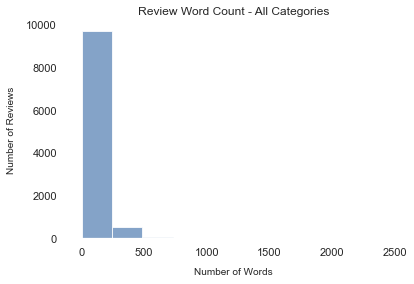

In [19]:
plot_est(reviews["num_words"],"Review Word Count - All Categories")

In [20]:
# Skew of data
reviews.num_words.skew()

5.713551672353397

In [21]:
# Shuffle dataframe
reviews_shuff = reviews.sample(frac=1)

In [22]:
# Which establishments have reviews greater than 1000 words
reviews[reviews["num_words"]>1000]["Name"]

1164           Butlins
2811           Butlins
3402           Butlins
3795           Butlins
5435           Butlins
5751    Bailiffs Court
7180           Butlins
8084           Butlins
8539           Butlins
9548       Church Farm
9650           Butlins
Name: Name, dtype: object

In [23]:
# Ratings for those establishments with the longest reviews over 1000 characters
reviews[reviews["num_words"]>1000]["Rating"].value_counts()

4    3
5    3
1    2
3    2
2    1
Name: Rating, dtype: int64

In [24]:
# Ratings for those reviews with less than 200 words 
reviews[reviews["num_words"]<=200]["Rating"].value_counts()

5    5912
4    1760
3     721
1     592
2     422
Name: Rating, dtype: int64

Appears that longer reviews are rated lower than those that are shorter

In [25]:
# Median length of reviews by rating
num_words_by_rating_median = round(reviews.groupby("Rating")["num_words"].median())
num_words_by_rating_median

Rating
1    105.0
2    116.0
3     94.0
4     68.0
5     59.0
Name: num_words, dtype: float64

In [26]:
# Most common length of review
reviews["num_words"].mode()

0    44
dtype: int64

In [27]:
# Mean number of words by rating
num_words_by_rating = round(reviews.groupby("Rating")["num_words"].mean())
num_words_by_rating

Rating
1    145.0
2    153.0
3    130.0
4    101.0
5     79.0
Name: num_words, dtype: float64

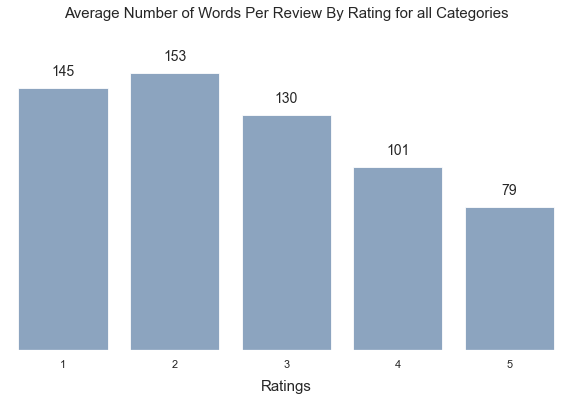

In [28]:
# Plot chart
a = num_words_by_rating.index
b = num_words_by_rating.values
b = b.astype(int)

plt.figure(figsize=(10,6))
ax= sns.barplot(a, b, color = "xkcd:faded blue", alpha = 0.8)
ax.set_facecolor("white")
ax.set_title("Average Number of Words Per Review By Rating for all Categories", fontsize = 15)
ax.set_xlabel('Ratings', fontsize = 15, labelpad = 10)
ax.set_yticklabels([])
ax.set_ylim(0,180)
rects = ax.patches
labels = b
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom',fontsize = 14)
plt.show();

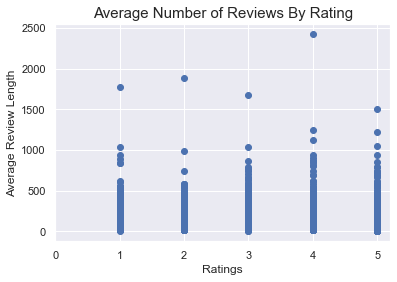

In [29]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.num_words)
plt.title("Average Number of Reviews By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Average Review Length")

In [30]:
# Boxplot excluding outliers
def box(x,y,title,ylabel):
    ax = sns.boxplot(x = x, y = y,showfliers = False, 
                     palette = ["lightsteelblue"])
    ax.set_facecolor("white")
    ax.set_ylabel(ylabel, fontsize = 12, labelpad = 10)
    ax.set_xlabel("Rating",fontsize = 12, labelpad = 10)
    ax = plt.title(title, fontsize = 13)
    plt.show()

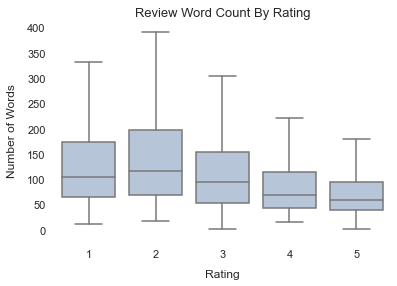

In [31]:
box(reviews["Rating"], reviews["num_words"],"Review Word Count By Rating","Number of Words")

Negative reviews appear to be longer than positive reviews based on average number or words per review

In [32]:
def stats_func(x,y):
    print("Shapiro Normality Test:",stats.shapiro(x))
    print("Levene Variance Test:",stats.levene(x[y == 1], x[y == 2], x[y == 3],x[y == 4],x[y == 5]))
    print("F-Test ANOVA:",stats.f_oneway(x[y == 1],x[y == 2], x[y == 3],x[y == 4],x[y == 5]))

In [33]:
stats_func(reviews["num_words"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.593267023563385, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=48.12714925113975, pvalue=9.00583138032651e-40)
F-Test ANOVA: F_onewayResult(statistic=92.54695524161845, pvalue=4.936527881503714e-76)


Data is not normally distributed and does not have constant variance but the sample size is large so with p < 0.05, we can reject the null hypothesis of the F-test of population means being the same.

## By Category

Is there a difference in the mean review length by rating for accommodation, food and attractions?

### Accommodation

In [34]:
hotel_num_words = reviews[reviews["Category"] == "Accommodation"]["num_words"]

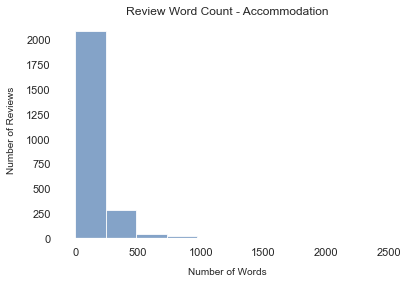

In [35]:
plot_est(hotel_num_words,"Review Word Count - Accommodation")

In [36]:
# Basic statistics on number of words for hotel reviews
hotel_num_words.describe()

count    2462.000000
mean      143.535743
std       159.481964
min         1.000000
25%        55.000000
50%        91.000000
75%       166.000000
max      2429.000000
Name: num_words, dtype: float64

In [37]:
# Average number of words by rating
hotel_average_review = round(reviews[reviews["Category"] == "Accommodation"].groupby("Rating")["num_words"].mean())
hotel_average_review

Rating
1    202.0
2    191.0
3    190.0
4    158.0
5    114.0
Name: num_words, dtype: float64

* Most hotel reviews are under 200 words but there are a number of very long reviews.
* The lowest rated reviews appear to be longer on average than the highest rated

### Food

In [38]:
food_num_words = reviews[reviews["Category"] == "Food"]["num_words"]

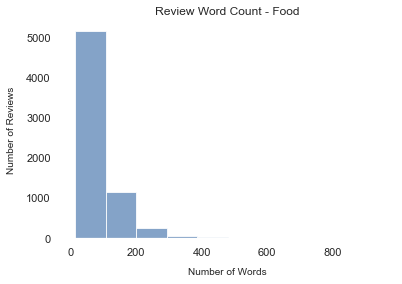

In [39]:
plot_est(food_num_words,"Review Word Count - Food")

In [40]:
# Basic statistics for number of words for restaurant reviews
food_num_words.describe()

count    6671.000000
mean       81.084395
std        67.285820
min        15.000000
25%        37.000000
50%        61.000000
75%       102.000000
max       943.000000
Name: num_words, dtype: float64

In [41]:
# Average number of words by rating
food_average_review = round(reviews[reviews["Category"] == "Food"].groupby("Rating")["num_words"].mean())
food_average_review

Rating
1    128.0
2    138.0
3    102.0
4     76.0
5     68.0
Name: num_words, dtype: float64

* Most restaurant reviews are under 100 words with again some longer reviews as outliers
* The lowest rated reviews are longer on average than the highest rated

### Attractions

In [42]:
attract_num_words = reviews[reviews["Category"] == "Attractions"]["num_words"]

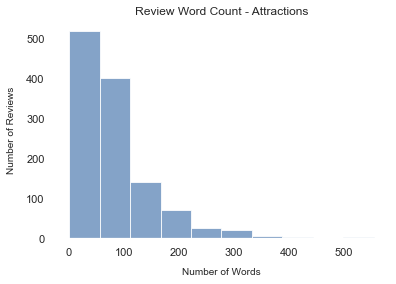

In [43]:
plot_est(attract_num_words,"Review Word Count - Attractions")

In [44]:
# Basic statistics for number of words for attraction reviews
attract_num_words.describe()

count    1192.000000
mean       84.745805
std        69.942390
min         1.000000
25%        39.000000
50%        62.500000
75%       105.000000
max       555.000000
Name: num_words, dtype: float64

In [45]:
# Average number of words by rating
attract_average_review = round(reviews[reviews["Category"] == "Attractions"].groupby("Rating")["num_words"].mean())
attract_average_review

Rating
1    119.0
2    156.0
3    109.0
4     84.0
5     79.0
Name: num_words, dtype: float64

* Most attraction reviews are under 50 words but there are some outliers, although the distribution is less skewed
* The lowest rated reviews are longer on average than the highest rated

In [46]:
# Create dataframe of the average review length by category
review_len = pd.concat([hotel_average_review,food_average_review,attract_average_review], axis = 1, ignore_index = True)
review_len.columns = ["Hotels","Attractions","Restaurants"]
review_len
#rest2.fillna(0)

Hotels  Attractions  Restaurants
Rating                                  
1        202.0        128.0        119.0
2        191.0        138.0        156.0
3        190.0        102.0        109.0
4        158.0         76.0         84.0
5        114.0         68.0         79.0

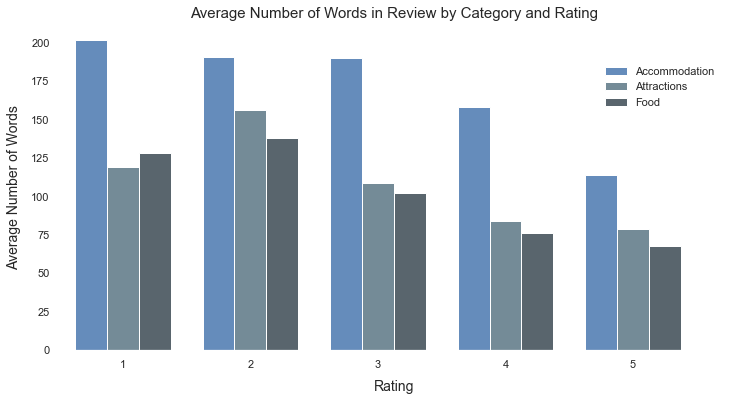

In [47]:
pos =list(range(len(review_len.iloc[:,0])))
width = 0.25 
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor("white")
ax.bar(pos,review_len["Hotels"] , width,label=review_len.index[0], color = "xkcd:faded blue") 
ax.bar([p + width for p in pos],review_len["Restaurants"] ,width,label= review_len.index[1], color = "xkcd:bluish grey") 
ax.bar([p + width*2 for p in pos],review_len["Attractions"],width,label=review_len.index[2], color = "xkcd:slate grey") 
ax.set_title("Average Number of Words in Review by Category and Rating", fontsize = 15)
#ax.set_ylim(ylim)
ax.grid(axis = 'y', color = "grey", linestyle = ":", alpha = 0.8)
ax.set_ylabel("Average Number of Words", fontsize = 14,labelpad = 10)
ax.set_xlabel("Rating",fontsize = 14, labelpad = 10)
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(review_len.index)
ax.set_xlim(min(pos)-width, max(pos)+width*4)
ax.legend(['Accommodation','Attractions','Food'],loc='upper left', frameon = False, bbox_to_anchor = (0.8,0.9))
plt.show()

* Hotel reviews are longer for lower rated reviews than higher
* This is also the case for food and attractions reviews with the exception of the lowest one-star rating. 

# Section 3: Word Length

Does the number of characters per word vary by rating? Do people use longer or shorter words when writing bad reviews?

In [48]:
# Find number of chars per review including spaces
reviews["num_chars"] = reviews['all_text'].apply(lambda x: len(x) - x.count(" "))
reviews.head(1)

Category            Name                       Title  \
0     Food  Motte & Bailey  Nice For A Quiet Breakfast   

                                              Review  Rating     Town  \
0  I stopped by Motte and Bailey for a quick bite...       4  Arundel   

                                            all_text  num_words  num_chars  
0  Nice For A Quiet Breakfast I stopped by Motte ...         96        393

In [49]:
# Get mean word length and sort by descending
reviews["av_word_len"] = reviews["num_chars"]/reviews["num_words"]
reviews.sort_values(by = "av_word_len",ascending = False).head(3)

Category         Name  \
8011  Accommodation  Hangar Down   
8580  Accommodation  Hangar Down   
7012  Accommodation  Hangar Down   

                                                  Title  \
8011  We had the pleasure of staying here for two ni...   
8580  Lovely two night stay at the B&B. Alison was w...   
7012  Arrived early as owner was accommodating for a...   

                         Review  Rating     Town  \
8011                  Fabulous        5  Arundel   
8580     Lovely, relaxing stay        5  Arundel   
7012  Beautiful Bed & Breakfast       5  Arundel   

                                               all_text  num_words  num_chars  \
8011  We had the pleasure of staying here for two ni...          1        417   
8580  Lovely two night stay at the B&B. Alison was w...          4        568   
7012  Arrived early as owner was accommodating for a...          4        561   

      av_word_len  
8011       417.00  
8580       142.00  
7012       140.25

In [50]:
# Group average characters by rating
reviews.groupby("Rating")["av_word_len"].mean()

Rating
1    4.192704
2    4.234509
3    4.365039
4    4.358311
5    4.625257
Name: av_word_len, dtype: float64

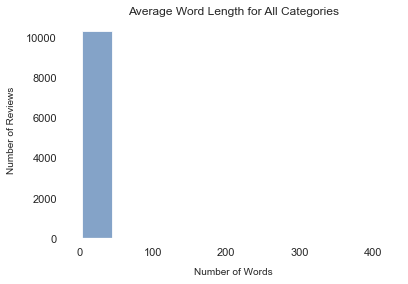

In [51]:
plot_est(reviews.av_word_len,"Average Word Length for All Categories")

In [52]:
# Skew of data
reviews.av_word_len.skew()

63.3084244118333

In [53]:
reviews

Category                Name  \
0               Food      Motte & Bailey   
1      Accommodation        Norfolk Arms   
2        Attractions      Arundel Castle   
3        Attractions  Digby Fine English   
4               Food      Middleton Café   
...              ...                 ...   
10320           Food           Navigator   
10321    Attractions     Inspire Leisure   
10322    Attractions      Arundel Castle   
10323           Food         Black Horse   
10324    Attractions        Regis Centre   

                                           Title  \
0                     Nice For A Quiet Breakfast   
1            Great value in the heart of arundel   
2                                   Big surprise   
3                                Very good wines   
4                                     1960s cafe   
...                                          ...   
10320                         Another great meal   
10321  Nice pool unnecessary change of direction   
10322                             Lovely day out   
10323                 Early supper weekday night   
10324                                old is best   

                                                  Review  Rating  \
0      I stopped by Motte and Bailey for a quick bite...       4   
1      Booked a room to stay the night in Arundel. Th...       4   
2      From the outside the castle is very impressive...       5   
3      Nice , helpful young man behind the counter.\n...       5   
4      This is a basic, clean and quaint cafe serving...       4   
...                                                  ...     ...   
10320  Back again at the Navigator, but this time for...       5   
10321  I joined the wave a few months ago as a swim m...       4   
10322  We visited here for the day and it was brillia...       5   
10323  After a full day out with friends in Arundel I...       5   
10324  The theatre is not at all modern but the volun...       4   

                Town                                           all_text  \
0            Arundel  Nice For A Quiet Breakfast I stopped by Motte ...   
1            Arundel  Great value in the heart of arundel Booked a r...   
2            Arundel  Big surprise From the outside the castle is ve...   
3            Arundel  Very good wines Nice , helpful young man behin...   
4             Bognor  1960s cafe This is a basic, clean and quaint c...   
...              ...                                                ...   
10320         Bognor  Another great meal Back again at the Navigator...   
10321  Littlehampton  Nice pool unnecessary change of direction I jo...   
10322        Arundel  Lovely day out We visited here for the day and...   
10323        Arundel  Early supper weekday night After a full day ou...   
10324         Bognor  old is best The theatre is not at all modern b...   

       num_words  num_chars  av_word_len  
0             96        393     4.093750  
1             46        202     4.391304  
2            101        424     4.198020  
3             50        236     4.720000  
4             55        225     4.090909  
...          ...        ...          ...  
10320        103        438     4.252427  
10321        183        776     4.240437  
10322         56        235     4.196429  
10323        167        739     4.425150  
10324         59        231     3.915254  

[10325 rows x 10 columns]

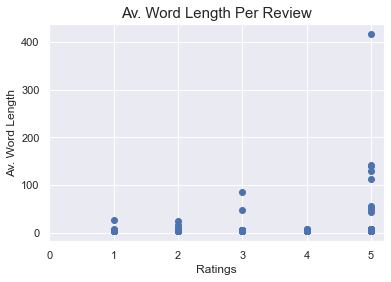

In [54]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.av_word_len)
plt.title("Av. Word Length Per Review", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Av. Word Length")

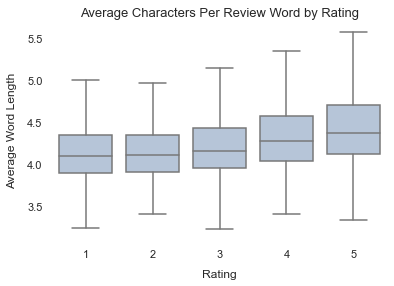

In [55]:
box(reviews["Rating"], reviews["av_word_len"],"Average Characters Per Review Word by Rating","Average Word Length")

In [56]:
stats_func(reviews["av_word_len"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.11673992872238159, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=1.2689218390395758, pvalue=0.27977598119982866)
F-Test ANOVA: F_onewayResult(statistic=6.774662872815893, pvalue=1.9595879058088417e-05)


* Data is slightly positively skewed, with non constant variance but large sample size so F-test accepted
* Reject null hypothesis of having the same population mean at 5% significance, there does appear to be a relationship between the average word length of a review and the rating given with longer words being used for higher rated reviews.

# Section 4: Capitalization

Does the amount of capitalisation used vary with the rating given? Are unhappy or happy people likely to use more capitalisation?

In [57]:
# Find number of upper case characters - ie do people 'shout' if not happy?
reviews['uppercase'] = reviews["all_text"].apply(lambda x: sum(char.isupper() for char in x))
reviews["prop_uc"] = reviews["uppercase"]/reviews["num_chars"]

In [58]:
# Sort by highest value for prop_uc
reviews.sort_values(by = "prop_uc",ascending = False).head(3)

Category      Name                          Title  \
7719  Accommodation  Avisford                 OVERNIGHT STAY   
3302  Accommodation   Butlins               Family disaster.   
2858           Food  Mustards  AMAZING FOOD AND PRESENTATION   

                                                 Review  Rating     Town  \
7719  What a treat we thought we were in for ...... ...       2  Arundel   
3302  PLEASE READ THIS EVERYONE. I visited here last...       1   Bognor   
2858  Went for breakfast with a friend, both had the...       5   Bognor   

                                               all_text  num_words  num_chars  \
7719  OVERNIGHT STAY What a treat we thought we were...        230        910   
3302  Family disaster. PLEASE READ THIS EVERYONE. I ...         59        235   
2858  AMAZING FOOD AND PRESENTATION Went for breakfa...         47        216   

      av_word_len  uppercase   prop_uc  
7719     3.956522        368  0.404396  
3302     3.983051         80  0.340426  
2858     4.595745         71  0.328704

In [59]:
# Look at one example - with negative rating
print(reviews["all_text"].iloc[290])

If in Arundel take the walk up the hill It is certainly worth calling into and is suitably impressive albeit on a relatively small scale compared to many cathedrals. Elegance and spaciousness of structure and lovely stained glass windows certainly make this very much part of a visit to the lovely town of Arundel.
Read less


In [60]:
# Example with positive rating
print(reviews["all_text"].iloc[6182])

Great quality  We ate in the Swan Hotel restaurant one midweek evening while staying in Arundel. It was fairly quiet, and our waiter was very polite and attentive. The food was extremely tasty, we had the fish and chips and the thyme roasted chicken which came with a warm salad of butternut squash, chickpeas and caramelised onions - delicious! Deserts were also good. Would definitely return.


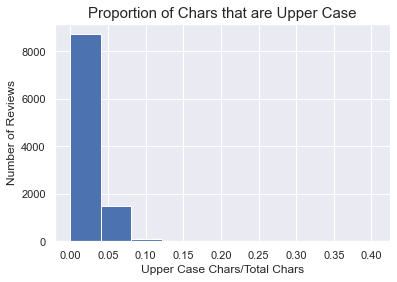

In [61]:
# Plot histogram of frequency of review size by number of words
plt.hist(reviews.prop_uc,bins = 10)
plt.xlabel("Upper Case Chars/Total Chars")
plt.ylabel("Number of Reviews")
ax = plt.title("Proportion of Chars that are Upper Case", fontsize = 15)

In [62]:
reviews.prop_uc.skew()

5.460535385935042

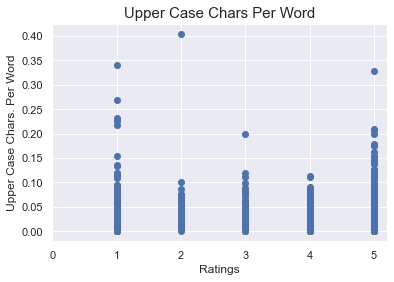

In [63]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.prop_uc)
plt.title("Upper Case Chars Per Word", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Upper Case Chars. Per Word")

In [64]:
reviews['prop_uc'].describe()

count    10325.000000
mean         0.029709
std          0.016126
min          0.000000
25%          0.020772
50%          0.026946
75%          0.035242
max          0.404396
Name: prop_uc, dtype: float64

In [65]:
# Average number of words by rating
uc_by_rating = reviews.groupby("Rating")["prop_uc"].mean()
uc_by_rating

Rating
1    0.029270
2    0.025232
3    0.025826
4    0.028095
5    0.031209
Name: prop_uc, dtype: float64

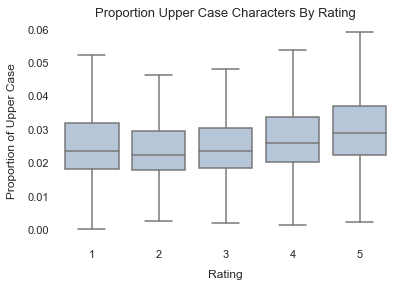

In [66]:
box(reviews["Rating"],reviews["prop_uc"],"Proportion Upper Case Characters By Rating","Proportion of Upper Case")

In [67]:
stats_func(reviews["prop_uc"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.6964908838272095, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=9.793573183042591, pvalue=6.870195988760852e-08)
F-Test ANOVA: F_onewayResult(statistic=18.87169042607686, pvalue=2.0547531042093156e-15)


* Data is heavily skewed, non-constant variance but large sample size.
* F-test ANOVA significant at 5% so reject null hypothesis that two or more groups have the same mean, suggests there is some relationship between the amount of capitalized letters used and the rating given to a review 
* The slight bow shape indicates capitalisation is used more for the most positive and negative reviews.

# Section 5: Punctuation

Does the amount of punctuation vary with rating given? Do happy or unhappy people use more or less punctuation?

In [68]:
# Find amount of punctuation and express as a proportion of all characters in a string
# includes [!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~]
import string
reviews['special_chars'] = reviews["all_text"].apply(lambda x: sum(char in string.punctuation for char in x))
reviews["prop_sc"] = reviews["special_chars"]/reviews["num_chars"]

In [69]:
# Sort by highest value for prop_uc
reviews.sort_values(by = 'prop_sc',ascending = False).head(2)

Category           Name                  Title  \
8687     Food  The Beresford  A good place to visit   
2749     Food  Partners Café                  Paddy   

                                                 Review  Rating     Town  \
8687  Excellent carvery ................... apart fr...       4   Bognor   
2749  Amazing breakfasts & service. Local favorite,a...       5  Arundel   

                                               all_text  num_words  num_chars  \
8687  A good place to visit Excellent carvery .........         22        134   
2749  Paddy Amazing breakfasts & service. Local favo...         18         98   

      av_word_len  uppercase   prop_uc  special_chars   prop_sc  
8687     6.090909          3  0.022388             24  0.179104  
2749     5.444444          3  0.030612             16  0.163265

In [70]:
# Example review - positive
print(reviews["all_text"].iloc[5094])

Lovely trip out Myself and my partner visited with the inlaws. Beautiful castle and grounds & very informative guides. All in all, a great day out!
Read less


In [71]:
# Example review - positive
print(reviews["all_text"].iloc[10229])

nice very interesting and historic building not majestic like some other cathedrals but nice never the less
Read less


In [72]:
# Example review - negative
print(reviews["all_text"].iloc[3117])

Delicious lunch! Enjoyed a very tasty lunch on Saturday. It was busy,but staff were coping well with the numbers and keeping up with the orders. Pleasant courtyard garden.


In [73]:
# Statistical summary
reviews['prop_sc'].describe()

count    10325.000000
mean         0.027310
std          0.012757
min          0.000000
25%          0.019432
50%          0.025907
75%          0.033333
max          0.179104
Name: prop_sc, dtype: float64

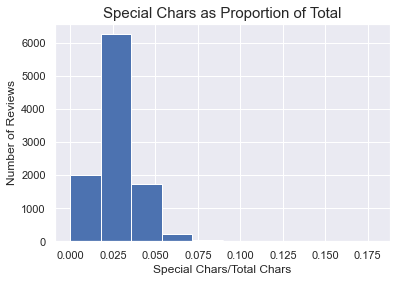

In [74]:
# Plot histogram of frequency of review size by number of words
plt.hist(reviews.prop_sc,bins = 10)
plt.xlabel("Special Chars/Total Chars")
plt.ylabel("Number of Reviews")
ax = plt.title("Special Chars as Proportion of Total", fontsize = 15)

In [75]:
reviews.prop_sc.skew()

1.4947868122380563

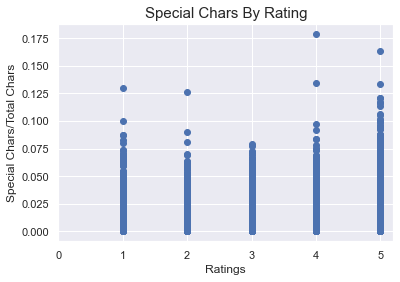

In [76]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.prop_sc)
plt.title("Special Chars By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Special Chars/Total Chars")

In [77]:
# Average number of words by rating
num_punct_by_rating = reviews.groupby("Rating")["prop_sc"].mean()
num_punct_by_rating

Rating
1    0.028261
2    0.026451
3    0.026096
4    0.026740
5    0.027620
Name: prop_sc, dtype: float64

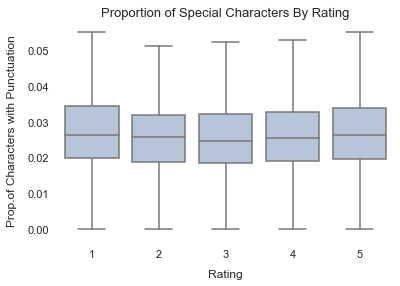

In [78]:
box(reviews["Rating"],reviews["prop_sc"],"Proportion of Special Characters By Rating","Prop.of Characters with Punctuation")

In [79]:
stats_func(reviews["prop_sc"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.9321959614753723, pvalue=6.810310536618611e-43)
Levene Variance Test: LeveneResult(statistic=0.8574488026793503, pvalue=0.48870884968104156)
F-Test ANOVA: F_onewayResult(statistic=1.5301313790845514, pvalue=0.1905073826256235)


* Data is postively skewed, with constant variance
* F-test ANOVA significant at 5% so reject null hypothesis that two or more groups have the same mean, suggests there is some relationship between the amount of punctuation
* The slight bow shape indicates punctuation is used more for the most positive and negative reviews.

# Section 6: Emojis and Emoticons

Sentiment is increasingly contained in emojis and emoticons.

* Does the number of emojis used per review vary with rating?


In [80]:
# Uncomment and run to get list of emoji icons
# emoji.EMOJI_ALIAS_UNICODE

In [81]:
# Sample text
test_post = reviews["all_text"].iloc[4]
test_post

'1960s cafe This is a basic, clean and quaint cafe serving good food at almost 1960s prices. Strangely there is also a well stocked bar with stools. It is somewhere for breakfast or a meal and the owners are very helpful. Good place to break if you are touring the south coast.'

In [82]:
# Function to find emojis in text
def find_emojies(text):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
    emoji = re.findall(EMOJI_PATTERN, text)
    return emoji

In [83]:
# Function to find emoticons
def find_emoticons (text):
    return emot.emoticons(text)

In [84]:
# Apply to dataframe
reviews["Emoji"] = reviews["all_text"].apply(find_emojies)

In [85]:
# Fill zeros for nan entries where there are no emojis
reviews["Emoji"]= reviews["Emoji"].apply(lambda x: np.nan if len(x)==0 else x)
reviews["Emoji"] = reviews["Emoji"].fillna(0)

In [86]:
# Count emojis
reviews["Emoji_count"] = reviews["Emoji"].apply(lambda x:len(x) if isinstance(x,list) else 0)                                                               

In [87]:
# Number of emojis used
reviews["Emoji_count"].value_counts()

0    10197
1       98
2       19
3        8
4        2
5        1
Name: Emoji_count, dtype: int64

In [88]:
# Proportion of emojis of words used in a review
reviews["Emoji_prop"] = reviews["Emoji_count"]/reviews["num_words"]

In [89]:
# Sort to see if there are outliers
reviews["Emoji_prop"].sort_values(ascending = False)

5342     0.157895
3318     0.120000
2741     0.066667
7623     0.054545
2299     0.050000
           ...   
3475     0.000000
3476     0.000000
3477     0.000000
3478     0.000000
10324    0.000000
Name: Emoji_prop, Length: 10325, dtype: float64

In [90]:
# Mean emoji proportion by rating
emoji_by_rating = reviews.groupby("Rating")["Emoji_prop"].mean()
emoji_by_rating

Rating
1    0.000205
2    0.000019
3    0.000077
4    0.000155
5    0.000284
Name: Emoji_prop, dtype: float64

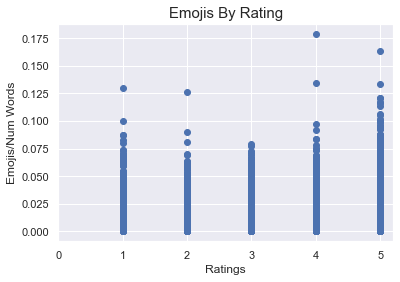

In [91]:
# Plot emojis as proportion of words against rating value
plt.scatter(reviews.Rating,reviews.prop_sc)
plt.title("Emojis By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Emojis/Num Words")

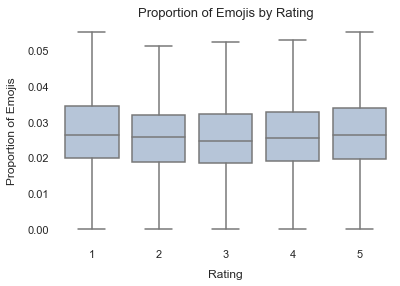

In [92]:
box(reviews["Rating"], reviews["prop_sc"],"Proportion of Emojis by Rating", "Proportion of Emojis")

In [93]:
stats_func(reviews["Emoji_prop"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.06693929433822632, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=1.2102996530739691, pvalue=0.3041310465246931)
F-Test ANOVA: F_onewayResult(statistic=1.2102996530739702, pvalue=0.3041310465246931)


No statistically significant relationship between the number of emojis used by a reviewer as a proportion of all the words in the review and the rating that is given. 

* Most emojis are positive most likely due to the skew towards positive ratings in the data
* There is no statistically significant relationship between the number of emojis used and the rating given

In [95]:
reviews.to_csv("Text_attributes.csv")

# Section 7: Heatmap

In [98]:
reviews.columns

Index(['Category', 'Name', 'Title', 'Review', 'Rating', 'Town', 'all_text',
       'num_words', 'num_chars', 'av_word_len', 'uppercase', 'prop_uc',
       'special_chars', 'prop_sc', 'Emoji', 'Emoji_count', 'Emoji_prop'],
      dtype='object')

In [99]:
correlation_df = reviews.drop(columns = ["Category","Name","Title","Review","Town","all_text","uppercase","special_chars","Emoji","Emoji_count"],axis= 1)

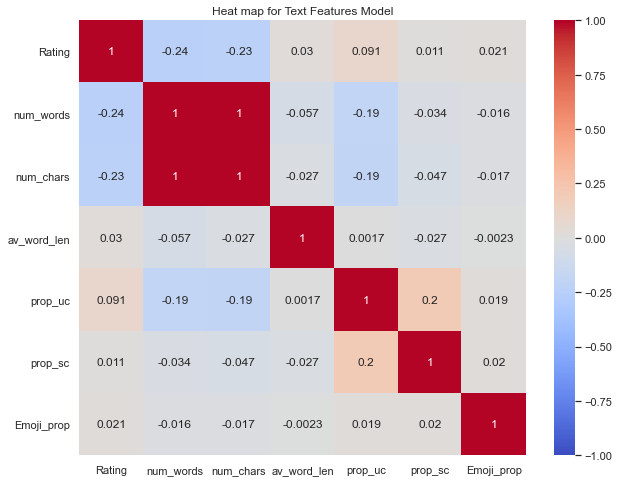

In [100]:
# Heatmap to show relationships
cor_mat = correlation_df.corr()
top_corr_features = cor_mat.index
plt.figure(figsize=(10,8))
plt.title("Heat map for Text Features Model")
#plot heat map
g=sns.heatmap(correlation_df[top_corr_features].corr(),annot=True,vmin=-1, cmap='coolwarm')

* The heatmap shows a positive correlation between rating and the average word length and a negative relationship with the number of words used in the review so negative reviews have more words on average
* The number of characters and the number of words are collinear, so one not both should be included in any model. 
* The rest of the features have very weak positive relationships with ratings. 
* Of interest is the correlation between the proportion of special characters used and the proportion of upper-case characters, suggesting capitalization and punctuation such as perhaps exclamation marks often occur together and they are both correlated with the average word length.

# Section 8: Extract Positive and Negative Review Titles and Text

In [101]:
# Get the shape of the combined reviews dataframe
reviews.shape

(10325, 17)

In [102]:
# Save out file
#reviews.to_csv("Reviews.csv")

In [103]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 1.0]["Title"].sample(5)

2435                 Disgusting
1410                    Erm No!
7663     Long wait. Bad service
10234              Evening meal
2227                 Rude staff
Name: Title, dtype: object

In [104]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 2.0]["Title"].sample(5)

7910          Very disappointing
2798        Poor standard Hilton
1261    quality of food was poor
8113            Meal with friend
9175           Very disappointed
Name: Title, dtype: object

In [105]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 3.0]["Title"].sample(5)

9313                                             Okay-ish
6248                                          Third Visit
3967    Good venue let down by a member of staff throw...
6915                       Disappointing customer service
3978                              Soul Weekender Feb 2019
Name: Title, dtype: object

In [106]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 4.0]["Title"].sample(5)

3606                                Accommodation Perfect
8349                              Delicious Turkish Mezze
6092                               Great value for money!
8764                    This restaurant never disappoints
781     Lovely cafe, good food and friendly owner and ...
Name: Title, dtype: object

In [107]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 5.0]["Title"].sample(5)

4930           Very nice food
7991                Delicious
1828         Lunch and drinks
9532    Lovely new restaurant
4051           Very welcoming
Name: Title, dtype: object

In [108]:
# Split into positive and negative based on ratings
reviews['Score'] = reviews['Rating'].apply(lambda x: "0" if x > 2 else "1")

In [109]:
reviews.shape

(10325, 18)

In [110]:
# Filter to only those rows with Rating not equal to 3 into a new dataframe
reviews_filtered = reviews[reviews["Rating"] != 3]
reviews_filtered.shape

(9455, 18)

In [111]:
# Save to CSV
#reviews2.to_csv("Scored_Reviews.csv",index = False)

In [112]:
# Check positive versus non-positive rating scores 
reviews_filtered.Score.value_counts()

0    8154
1    1301
Name: Score, dtype: int64

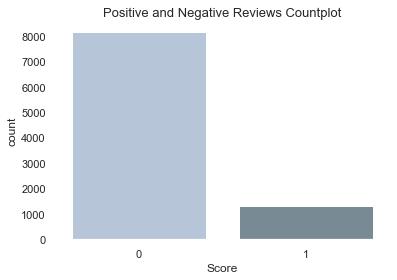

In [113]:
# Coutnplot of the positive and negative scores for all reviews - negative reviews are the minority class since they are the
# class we are interested in
figure, ax = plt.subplots()
ax = sns.countplot("Score",data = reviews_filtered, palette = ["lightsteelblue","xkcd:bluish grey"])
ax.set_facecolor("White")
ax.set_title("Positive and Negative Reviews Countplot", fontsize = 13)
plt.show()

In [114]:
# Average number of words by score
reviews_filtered.groupby("Score")["num_words"].mean()

Score
0     84.479642
1    148.356649
Name: num_words, dtype: float64

In [115]:
# Drop unnecessary column
reviews_filtered = reviews_filtered.drop(columns = ["num_words"], axis = 1)

In [116]:
# Join the Title and Text together into a single column called 'all_text'
# combine title and text together
reviews_filtered['all_text'] = reviews_filtered['Title'] + ' ' + reviews_filtered['Review']
reviews_filtered.head(1)

Category            Name                       Title  \
0     Food  Motte & Bailey  Nice For A Quiet Breakfast   

                                              Review  Rating     Town  \
0  I stopped by Motte and Bailey for a quick bite...       4  Arundel   

                                            all_text  num_chars  av_word_len  \
0  Nice For A Quiet Breakfast I stopped by Motte ...        393      4.09375   

   uppercase   prop_uc  special_chars   prop_sc Emoji  Emoji_count  \
0         13  0.033079              7  0.017812     0            0   

   Emoji_prop Score  
0         0.0     0

In [117]:
# Examine original text of review and title - as some reviews only have titles and the titles contain information
print(reviews_filtered["all_text"][4])

1960s cafe This is a basic, clean and quaint cafe serving good food at almost 1960s prices. Strangely there is also a well stocked bar with stools. It is somewhere for breakfast or a meal and the owners are very helpful. Good place to break if you are touring the south coast.


In [118]:
# Get the text of reviews within each category
text_hotels = reviews_filtered[reviews_filtered["Category"] == "Accommodation"] 
text_rests= reviews_filtered[reviews_filtered["Category"] == "Food"] 
text_attract = reviews_filtered[reviews_filtered["Category"] == "Attractions"] 

In [119]:
text_hotels.head(2)

Category          Name                                 Title  \
1  Accommodation  Norfolk Arms   Great value in the heart of arundel   
9  Accommodation    Town House  Excellent food,service and ambience!   

                                              Review  Rating     Town  \
1  Booked a room to stay the night in Arundel. Th...       4  Arundel   
9  We’ve eaten here with a group of friends who g...       5  Arundel   

                                            all_text  num_chars  av_word_len  \
1  Great value in the heart of arundel Booked a r...        202     4.391304   
9  Excellent food,service and ambience! We’ve eat...        781     4.176471   

   uppercase   prop_uc  special_chars   prop_sc Emoji  Emoji_count  \
1          7  0.034653              3  0.014851     0            0   
9         12  0.015365             22  0.028169     0            0   

   Emoji_prop Score  
1         0.0     0  
9         0.0     0

In [120]:
# Find number of words in the total of all reviews by category
text_h = " ".join(review for review in text_hotels.all_text)
print ("There are {} words in the combination of all hotel reviews.".format(len(text_h)))
text_r = " ".join(review for review in text_rests.all_text)
print ("There are {} words in the combination of all restaurant reviews.".format(len(text_r)))
text_a = " ".join(review for review in text_attract.all_text)
print ("There are {} words in the combination of all attraction reviews.".format(len(text_a)))
text_all = " ".join(review for review in reviews_filtered.all_text)
print ("There are {} words in the combination of all reviews.".format(len(text_all)))

There are 1525883 words in the combination of all hotel reviews.
There are 2520818 words in the combination of all restaurant reviews.
There are 484264 words in the combination of all attraction reviews.
There are 4530967 words in the combination of all reviews.


# Section 9: Positive and Negative Word Clouds

In [121]:
# Get positive and negative reviews for each category and put into separate dataframes
hotels_positive = text_hotels[text_hotels["Score"] == "0"]
rests_positive = text_rests[text_rests["Score"] == "0"]
attract_positive = text_attract[text_attract["Score"] == "0"]

# Extract negative review titles for each category of establishment
hotels_negative = text_hotels[text_hotels["Score"] == "1"]
rests_negative = text_rests[text_rests["Score"] == "1"]
attract_negative = text_attract[text_attract["Score"] == "1"]

In [122]:
# Join all positive reviews together
all_text_h_positive = " ".join(review for review in hotels_positive.all_text)
all_text_r_positive = " ".join(review for review in rests_positive.all_text)
all_text_a_positive = " ".join(review for review in attract_positive.all_text)

# Join all negative reviews together
all_text_h_negative = " ".join(review for review in hotels_negative.all_text)
all_text_r_negative = " ".join(review for review in rests_negative.all_text)
all_text_a_negative = " ".join(review for review in attract_negative.all_text)

In [123]:
# Amend stopwords to remove words scraped from online review in error
stopwords = list(STOPWORDS)
stopwords.append("read")
stopwords.append("less")
stopwords.append("more")
stopwords = set(stopwords)

In [124]:
# Function to generate wordcloud
def gen_wordcloud(df):
    wc = WordCloud(stopwords=stopwords, background_color="white").generate(df)
    return wc

In [125]:
# Generate wordclouds
wordcloud_h_positive = gen_wordcloud(all_text_h_positive)
wordcloud_r_positive = gen_wordcloud(all_text_r_positive)
wordcloud_a_positive = gen_wordcloud(all_text_a_positive)
wordcloud_h_negative = gen_wordcloud(all_text_h_negative)
wordcloud_r_negative = gen_wordcloud(all_text_r_negative)
wordcloud_a_negative = gen_wordcloud(all_text_a_negative)

## Accommodation

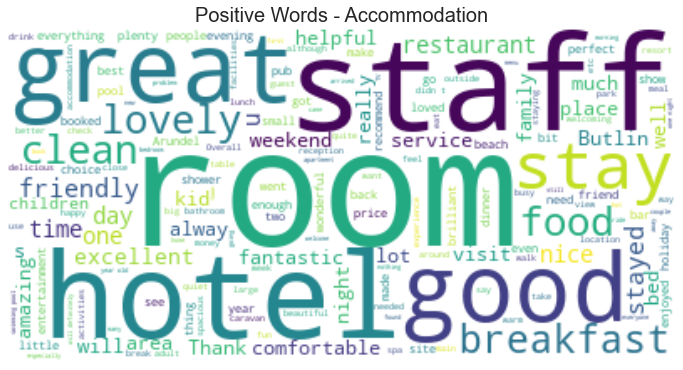

In [126]:
# Display the generated image: Hotels positive words
plt.figure(figsize=[12,10])
plt.title("Positive Words - Accommodation", fontsize = 20)
plt.imshow(wordcloud_h_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

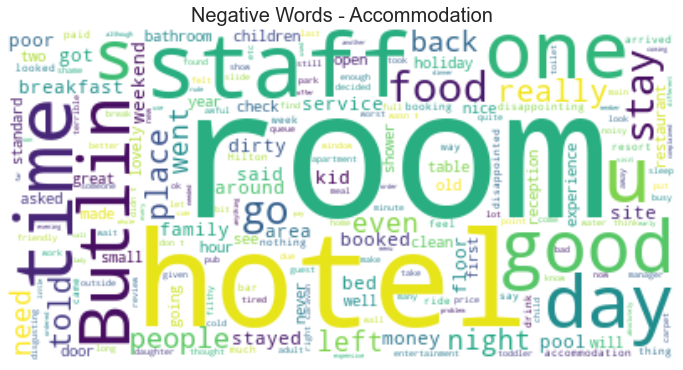

In [127]:
# Display the generated image: Hotels Negative words
plt.figure(figsize=[12,10])
plt.title("Negative Words - Accommodation", fontsize = 20)
plt.imshow(wordcloud_h_negative,interpolation='bilinear')
plt.axis("off")
plt.show()

## Food

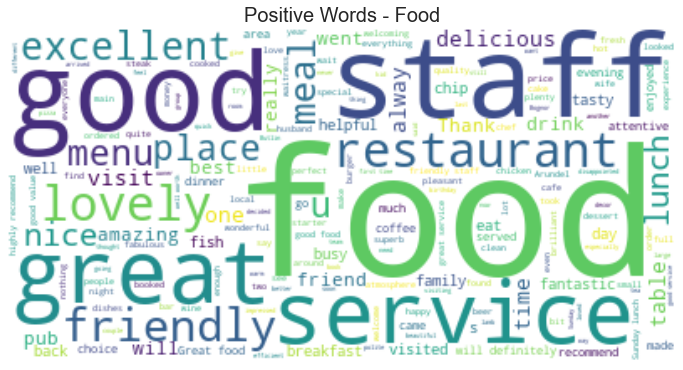

In [128]:
# Display the generated image: Food positive reviews
plt.figure(figsize=[12,10])
plt.title("Positive Words - Food", fontsize = 20)
plt.imshow(wordcloud_r_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

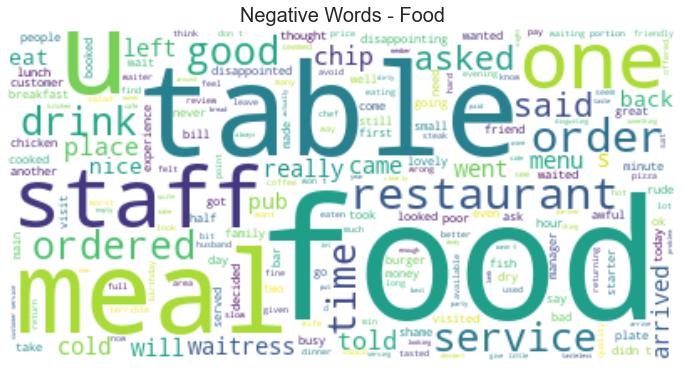

In [129]:
# Display the generated image: Food negative reviews
plt.figure(figsize=[12,10])
plt.title("Negative Words - Food", fontsize = 20)
plt.imshow(wordcloud_r_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

## Attractions 

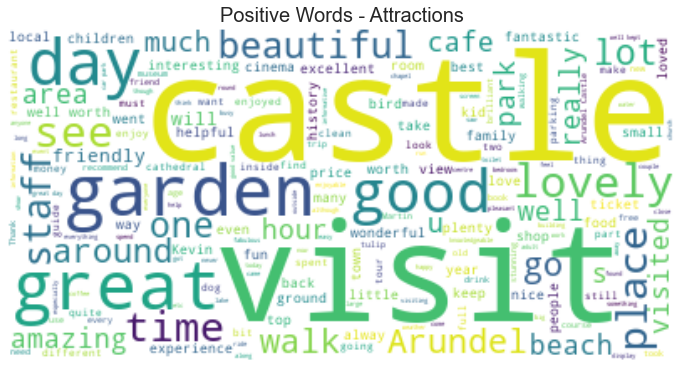

In [130]:
# Display the generated image: Positive attraction reviews
plt.figure(figsize=[12,10])
plt.title("Positive Words - Attractions", fontsize = 20)
plt.imshow(wordcloud_a_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

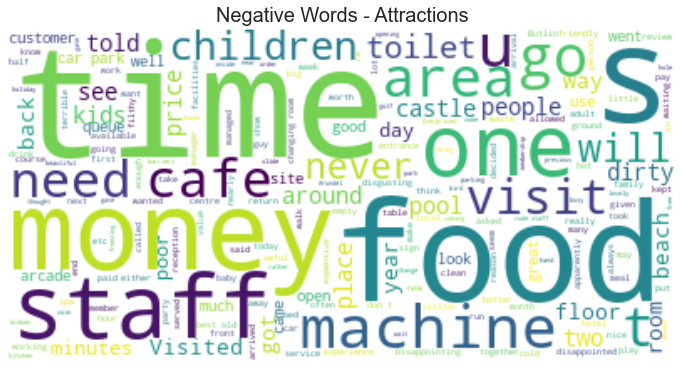

In [131]:
# Display the generated image: Negative attraction reviews
plt.figure(figsize=[12,10])
plt.title("Negative Words - Attractions", fontsize = 20)
plt.imshow(wordcloud_a_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

# Section 10: Word Frequencies

## Accommodation

In [132]:
# Top positive words for hotel reviews
all_text_h_positive = all_text_h_positive.lower()
words_h_positive = [word for word in all_text_h_positive.split() if word not in stopwords]
word_count_h_positive = collections.Counter(words_h_positive)
top_h_positive = word_count_h_positive.most_common()
top_five_h_positive = top_h_positive[0:6]

for tup in top_five_h_positive:
    if tup[0] == "-":
        top_five_h_positive.remove(tup)

print(top_five_h_positive)

[('room', 1164), ('staff', 1125), ('good', 1116), ('great', 1099), ('hotel', 944), ('stay', 847)]


In [133]:
# Top negative words for hotel reviews
all_text_h_negative = all_text_h_negative.lower()
words_h_negative = [word for word in all_text_h_negative.split() if word not in stopwords]
word_count_h_negative = collections.Counter(words_h_negative)
top_h_negative = word_count_h_negative.most_common()
top_five_h_negative = top_h_negative[0:6]

for tup in top_five_h_negative:
    if tup[0] == "-":
        top_five_h_negative.remove(tup)

print(top_five_h_negative)

[('room', 321), ('staff', 199), ('one', 149), ('hotel', 147), ('us', 146)]


## Food

In [134]:
# Top positive words for food reviews
all_text_r_positive = all_text_r_positive.lower()
words_r_positive = [word for word in all_text_r_positive.split() if word not in stopwords]
word_count_r_positive = collections.Counter(words_r_positive)
top_r_positive = word_count_r_positive.most_common()
top_five_r_positive = top_r_positive[0:6]

for tup in top_five_r_positive:
    if tup[0] == "-":
        top_five_r_positive.remove(tup)

print(top_five_r_positive)

[('food', 3826), ('great', 2835), ('good', 2632), ('staff', 1958), ('lovely', 1879), ('service', 1831)]


In [135]:
# Top negative words for food reviews
all_text_r_negative = all_text_r_negative.lower()
words_r_negative = [word for word in all_text_r_negative.split() if word not in stopwords]
word_count_r_negative = collections.Counter(words_r_negative)
top_r_negative = word_count_r_negative.most_common()
top_five_r_negative = top_r_negative[0:6]

for tup in top_five_r_negative:
    if tup[0] == "-":
        top_five_r_negative.remove(tup)

print(top_five_r_negative)

[('food', 756), ('staff', 360), ('us', 321), ('one', 317), ('service', 311), ('table', 290)]


## Attractions

In [136]:
# Top positive words for attraction reviews
all_text_a_positive = all_text_a_positive.lower()
words_a_positive = [word for word in all_text_a_positive.split() if word not in stopwords]
word_count_a_positive = collections.Counter(words_a_positive)
top_a_positive = word_count_a_positive.most_common()
top_five_a_positive = top_a_positive[0:6]

for tup in top_five_a_positive:
    if tup[0] == "-":
        top_five_a_positive.remove(tup)

print(top_five_a_positive)

[('great', 472), ('castle', 430), ('well', 367), ('good', 335), ('lovely', 315), ('day', 310)]


In [137]:
# Top negative words for attraction reviews
all_text_a_negative = all_text_a_negative.lower()
words_a_negative = [word for word in all_text_a_negative.split() if word not in stopwords]
word_count_a_negative = collections.Counter(words_a_negative)
top_a_negative = word_count_a_negative.most_common()
top_five_a_negative = top_a_negative[0:11]

for tup in top_five_a_negative:
    if tup[0] == "-":
        top_five_a_negative.remove(tup)

print(top_five_a_negative)

[('staff', 28), ('one', 22), ('food', 22), ('go', 19), ('time', 18), ('money', 18), ('us', 17), ('will', 16), ('never', 16), ('car', 16), ('machines', 15)]
